# Your info

Full name: Yasmin Madani

Student ID: 97532265

# Q2. MLP

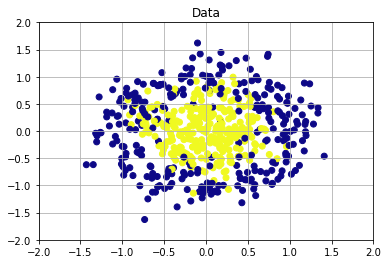

In [1]:
# Q2_graded
# Do not change the above line.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
np.random.seed(0)
# Dataset
X,Y = datasets.make_circles(n_samples=576, shuffle=True, noise=0.25, random_state=None, factor=0.4)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='plasma')
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('Data')
plt.show()

In [2]:
# Q2_graded
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [3]:
# Q2_graded
X=X.T
Y=np.reshape(Y,(1,576))

accuracy of 100_count: 0.588542
accuracy of 200_count: 0.480903
accuracy of 300_count: 0.729167
accuracy of 400_count: 0.737847
accuracy of 500_count: 0.697917
accuracy of 600_count: 0.711806
accuracy of 700_count: 0.713542
accuracy of 800_count: 0.718750
accuracy of 900_count: 0.704861
accuracy of 1000_count: 0.677083
accuracy of 1100_count: 0.692708
accuracy of 1200_count: 0.690972
accuracy of 1300_count: 0.682292
accuracy of 1400_count: 0.701389
accuracy of 1500_count: 0.690972
accuracy of 1600_count: 0.732639
accuracy of 1700_count: 0.722222
accuracy of 1800_count: 0.776042
accuracy of 1900_count: 0.850694
accuracy of 2000_count: 0.838542
accuracy of 2100_count: 0.763889
accuracy of 2200_count: 0.671875
accuracy of 2300_count: 0.758681
accuracy of 2400_count: 0.704861
accuracy of 2500_count: 0.659722
accuracy of 2600_count: 0.649306
accuracy of 2700_count: 0.626736
accuracy of 2800_count: 0.637153
accuracy of 2900_count: 0.618056
accuracy of 3000_count: 0.642361
accuracy of 3100_co

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Text(0.5, 1.0, 'Decision Boundary ')

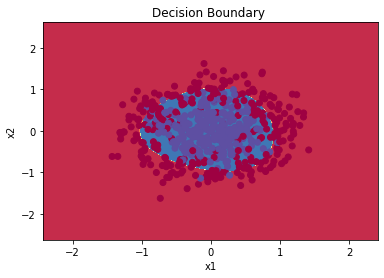

In [4]:
# Q2_graded
m = 400
i_count = 1
def for_prop(X, parameters, n_layers,le_r):
    cache = {}
    outp = X

    for ind in range(n_layers - 1):
        b_name = "b" + str(ind)
        w_name = "w" + str(ind)
        a_name = "a" + str(ind)
        z_name = "z" + str(ind)
        cache[z_name] = np.dot(parameters[w_name], outp) + parameters[b_name]
        if (ind != n_layers - 2):
            cache[a_name] = np.tanh(cache[z_name])
        else:
            cache[a_name] = sigmoid(cache[z_name])
            tempp = cache[a_name]
            tempp[tempp>0.5]=1
            tempp[tempp<=0.5]=0
            accuracy = np.sum(Y[0] == tempp ) / len(Y[0])
            global i_count
            if i_count % 100 == 0:
              print("accuracy of %i_count: %f" % (i_count, accuracy))
            i_count+=1
        outp = cache[a_name]
    return outp, cache


def ReLu(inp):
    return np.maximum(inp, 0)


def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

def back_prop(parameters, cache, X, Y, n_layers,le_r):
    m = X.shape[1]
    dzlast = []

    for ind in range(n_layers - 2, -1, -1):
        alast = "a" + str(ind - 1)

        b_name = "b" + str(ind)
        w_name = "w" + str(ind)
        a_name = "a" + str(ind)
        z_name = "z" + str(ind)

        output = cache[a_name]
        if (ind == 0):
            output = X.T
        else:
            output = cache[alast].T

        curw = parameters[w_name]
        curb = parameters[b_name]
        if (ind == n_layers - 2):
            dz = cache[a_name] - Y
            dw = 1.0 / m * np.dot(dz, output)
            db = 1.0 / m * np.sum(dz, axis=1, keepdims=True)
            dzlast = dz
            parameters[w_name] = curw - le_r * dw
            parameters[b_name] = curb - le_r * db
        else:
            wlast = "w" + str(ind + 1)
            w_cur = parameters[wlast]
            w_cur = np.einsum('ij->ji', w_cur)
            dz = np.dot(w_cur, dzlast) * (1 - np.power(cache[a_name], 2))
            dw = 1.0 / m * np.dot(dz, output)
            db = 1.0 / m * np.sum(dz, axis=1, keepdims=True)
            dzlast = dz
            parameters[w_name] = curw - le_r * dw
            parameters[b_name] = curb - le_r * db

    return parameters


def mlp(X, Y, inp,le_r=0.01, num_it=10000):
    # np.random.seed(3)
    inp.append(1)
    inp.insert(0, 2)
    weights = []
    bias = []
    parameters = {}
    n_layers = len(inp)
    for ind in range(len(inp) - 1):
        bias.append(np.zeros((inp[ind + 1], 1)))
        b_name = "b" + str(ind)
        w_name = "w" + str(ind)
        parameters[b_name] = bias[ind]
        parameters[w_name] = np.random.randn(inp[ind + 1], inp[ind])
    for i in range(0, num_it):
        output, cache = for_prop(X, parameters, n_layers,le_r)
        parameters = back_prop(parameters, cache, X, Y, n_layers,le_r)
    return parameters


def predict(parameters, X, n,le_r):
    output, cache = for_prop(X, parameters, n,le_r)
    predictions = (output > 0.5)

    return predictions


inputs = [3,3]
parameters = mlp(X, Y, inputs,0.1, num_it=10000)

plot_decision_boundary(lambda x: predict(parameters, x.T, len(inputs),le_r=0.01), X, Y.flatten())
plt.title("Decision Boundary ")

# Q3. Keras


In [5]:
# Q3_graded
# Do not change the above line.
import tensorflow as tf
import random
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from sklearn.utils import shuffle
from keras import regularizers
from keras.utils.np_utils import to_categorical 
# Type your code here

Load Data

In [6]:
#Q3_graded
tf.random.set_seed(2022)
random.seed(2022)
np.random.seed(2022)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

170508288/170498071 [==============================] - 11s 0us/step


MLP

In [7]:
# Q3_graded
from tensorflow.python.keras.engine.input_layer import Input
model = keras.models.Sequential(
    [
     keras.layers.Input(shape=(32,32,3)),
     keras.layers.Flatten(),
     keras.layers.Dense(units=512, 
        kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4),
        activity_regularizer=regularizers.l2(1e-5),
        activation='relu'),
     keras.layers.Dense(units=10, activation='softmax'),
    ]
)

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.1),
              metrics=['accuracy'],
              )
y_train = np.array(y_train)
X_train = np.array(X_train)
y_train, X_train = shuffle(y_train, X_train)
result = model.fit(X_train, 
          y_train, 
          batch_size=512,
          epochs=50, 
          shuffle=True,
          validation_split=0.1
         )
ev=model.evaluate(X_test,y_test)

Epoch 1/50
88/88 [==============================] - 8s 26ms/step - loss: 2.5454 - accuracy: 0.2256 - val_loss: 2.4198 - val_accuracy: 0.2972
Epoch 2/50
88/88 [==============================] - 1s 12ms/step - loss: 2.3717 - accuracy: 0.3136 - val_loss: 2.3385 - val_accuracy: 0.3272
Epoch 3/50
88/88 [==============================] - 1s 10ms/step - loss: 2.3078 - accuracy: 0.3390 - val_loss: 2.2966 - val_accuracy: 0.3494
Epoch 4/50
88/88 [==============================] - 1s 9ms/step - loss: 2.2675 - accuracy: 0.3556 - val_loss: 2.2694 - val_accuracy: 0.3576
Epoch 5/50
88/88 [==============================] - 1s 9ms/step - loss: 2.2393 - accuracy: 0.3661 - val_loss: 2.2391 - val_accuracy: 0.3670
Epoch 6/50
88/88 [==============================] - 1s 9ms/step - loss: 2.2171 - accuracy: 0.3775 - val_loss: 2.2210 - val_accuracy: 0.3796
Epoch 7/50
88/88 [==============================] - 1s 9ms/step - loss: 2.1971 - accuracy: 0.3823 - val_loss: 2.2040 - val_accuracy: 0.3928
Epoch 8/50
88/88 

Ploting

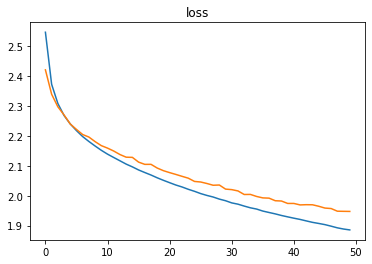

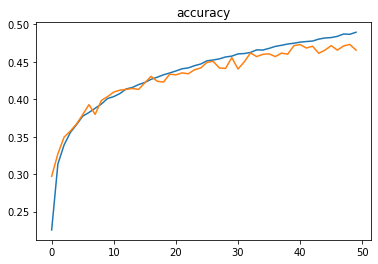

6
[6]


In [8]:
# Q3_graded
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('loss')
plt.show()
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('accuracy')
plt.show()
preds = model.predict(X_test)
my_preds = preds.argmax(axis=1)
print(my_preds[5])
print(y_test[5])

# Q5. Extra


In [9]:
# Q5_graded
# Do not change the above line.

# Type your code here

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID.
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q1_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/10GMhGM/Screen-Shot-2021-03-21-at-02-16-25.png)
  
    You should upload your **codes** and your **notebook** in `HW1` section and your final report for all of the questions as a **single pdf** file in `HW1 - Report`. Autograder will automatically check for:
    - `CI002_HW1.ipynb`
    - `Q2.py`
    - `Q3.py`
    - `Q5.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.